
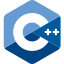
<br>

<div style="text-align:center; font-size:200%;">
 <b>Einführung in die Standardbibliothek</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 13 Einführung in die Standardbibliothek.ipynb -->
<!-- slides/module_190_standard_library/topic_110_intro_standard_lib.cpp -->


# Bestandteile der Standardbibliothek

- Low-Level-Unterstützung (Speicherverwaltung, Ausnahmen, RTTI, ...)
- C-Standardbibliothek
- Utilities (Smart Pointer, Funktionswrapper, Tupel, Optional, ...)
- Metaprogrammierungs-Utilities (Type Traits, Type Manipulation, ...)
- Numerik, komplexe Zahlen, Zufallszahlen
- Strings, String-Views, reguläre Ausdrücke
- I/O-Streams, Formatierung, Dateisystem
- Container, Iteratoren, Algorithmen, Ranges (STL)
- Konzepte
- Nebenläufigkeit, Threads, Coroutinen


## Organisation der Standardbibliothek

- Header Dateien
  - `#include <header>`
- Namespace `std`
  - Wenige Unter-Namespaces (z.B. `std::chrono`)

In [ ]:
#include <iostream>

In [ ]:
std::cout << 123;

In [ ]:
#include <math.h>

In [ ]:
std::cout << pow(2.0, 3.0);

In [ ]:
#include <cmath>

In [ ]:
std::cout << std::pow(2.0, 3.0);


## Workshop:Verwendung der Standardbibliothek

- Schreiben Sie eine Funktion `int string_to_int(const std::string& str)`,
  die eine Zeichenkette als Argument entgegennimmt und in eine `int`-Zahl
  umwandelt, falls das möglich ist. Andernfalls soll die Funktion eine
  geeignete Exception werfen.
- Verwenden Sie den `std::pair`-Typ aus dem `utility`-Header, um eine
  Funktion zu schreiben, die einen Vektor von `int`-Werten als Argument
  entgegennimmt und das Minimum und das Maximum der Werte zurückgibt.

### Hinweise

- Die Exceptions der Standardbibliothek sind in dem Header
  [`stdexcept`](https://en.cppreference.com/w/cpp/header/stdexcept)
  definiert.
- Dokumentation zu
  [`std::pair`](https://en.cppreference.com/w/cpp/utility/pair)

In [ ]:
#include <stdexcept>
#include <string>

In [ ]:
int string_to_int(const std::string& inStr) {
    std::string str{inStr};
    int result = 0;
    int sign = 1;
    if (str.length() == 0) {
        throw std::invalid_argument("string_to_int: argument is empty");
    }
    if (str[0] == '-') {
        sign = -1;
        str.erase(0, 1);
    }
    for (char c : str) {
        if (!std::isdigit(c)) {
            throw std::invalid_argument("string_to_int: argument is not a number");
        }
        result = result * 10 + (c - '0');
    }
    return sign * result;
}

In [ ]:
std::cout << string_to_int("123");

In [ ]:
std::cout << string_to_int("-123");

In [ ]:
try {
    std::cout << string_to_int("abc");
} catch (const std::invalid_argument& e) {
    std::cerr << e.what() << std::endl;
}

In [ ]:
int string_to_int(const std::string& str) {
    return std::stoi(str);
 }

In [ ]:
std::cout << string_to_int("123");

In [ ]:
std::cout << string_to_int("-123");

In [ ]:
try {
    std::cout << string_to_int("abc");
} catch (const std::invalid_argument& e) {
    std::cerr << e.what() << std::endl;
}

In [ ]:
#include <vector>
#include <utility>

In [ ]:
std::pair<int, int> minmax(const std::vector<int>& values) {
    if (values.empty()) {
        return {0, 0};
    }

    std::pair<int, int> result{values[0], values[0]};

    for (int value : values) {
        if (value < result.first) {
            result.first = value;
        }
        if (value > result.second) {
            result.second = value;
        }
    }

    return result;
}

In [ ]:
std::vector<int> values{6, 7, 8, 9, 10, 1, 2, 3, 4, 5};

In [ ]:
std::pair<int, int> res{minmax(values)};
std::cout << "min: " << res.first << ", max: " << res.second;